## EDA OF ROTTEN TOMATOES MERGED DATASET

In this section, we will perform Exploratory Data Analysis on the merged Rotten Tomatoes dataset to uncover meaningful insights that can guide our business objective. Our goal is to advise a new movie studio on what types of films perform best at the box office. Through EDA, we will explore key variables such as movie ratings, genres, release months, runtimes, and director performance to identify patterns and trends. These insights will help us understand which factors contribute most to a movie’s success, allowing the studio to make data-driven decisions when producing and releasing future films.

To achieve this, we will use visualizations such as bar charts, scatter plots, and grouped summaries to explore relationships between variables. For instance, we will analyze how average ratings vary across genres, how the month of release affects movie performance, which directors consistently receive higher ratings, and whether runtime correlates with audience reception. These visual tools not only make complex data easier to understand but also help us identify trends, outliers, and potential areas for deeper analysis. Ultimately, the insights drawn from this EDA will provide evidence-based recommendations to help the new studio make informed decisions about the types of films to produce and when to release them for maximum audience engagement and success.

In [1]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset for EDA
merged_df1 = pd.read_csv("cleaned_merged_df.csv")
merged_df1 = merged_df1.copy()
merged_df1

,id,rating,genre,director,writer,theater_date,runtime,rating_10_point,fresh
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,104,6.2,1.0
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,108,6.2,1.0
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,116,6.8,1.0
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,128,6.0,1.0
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200,6.2,1.0
...,...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,unknown,unknown,2006-08-18,106,6.2,1.0
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,88,5.1,0.0
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,unknown,1962-01-01,111,6.0,1.0
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,101,5.9,1.0


### Univariate Analysis

First of all, we are going to do Univariate Analysis which is basically examining one variable at a time, in order to understand the distribution of the variable.

Before we start analysing the data, we will first explode the genres so that we can get each genre separately, because some of the movies have combined genres, and we would like to examine each separately.

In [3]:
#Exploding the 'genre' column so that we can get each genre on its own
merged_df1['genre'] = merged_df1['genre'].str.split('|')
merged_df1_exploded = merged_df1.explode('genre')

Secondly, we are going to make sure that the 'theater_date' column has been converted to datetime format so that we can be able to extract the month alone, and get an analysis per month, which is more effective.

In [4]:
#Changing the 'theater_date' to datetime format
merged_df1['theater_date'] = pd.to_datetime(merged_df1['theater_date'], errors='coerce')

#Extracting month name from release_date
merged_df1['theater_month'] = merged_df1['theater_date'].dt.month_name()

#### Univariate analysis on Distribution of Ratings

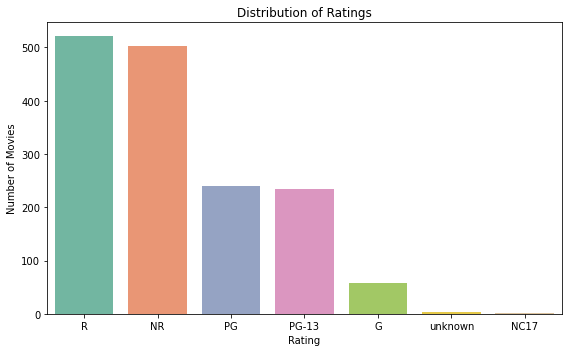

In [5]:
#Getting the value counts of each rating
rating_counts = merged_df1['rating'].value_counts()

#Plotting the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set2')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

**Observations:**

The majority of movies in the dataset are rated R, meaning they contain mature content and are restricted to adult audiences. A significant number are NR, suggesting they were either not officially submitted for rating or are independent productions. PG and PG-13 ratings have comparable distributions, likely targeting broader family and teen audiences. G-rated films are present but relatively less frequent, and NC-17 movies are very rare, possibly due to their market limitations and distribution challenges.

**Key Insight**

The dominance of R-rated content may indicate a preference among studios or audiences for mature themes, especially in commercial films. The notable presence of NR titles points to a significant share of independent productions or festival films. Meanwhile, PG and PG-13 films maintain a stable presence, suggesting consistent demand in family and teen segments. The rarity of G and NC-17 films suggests narrower audience appeal or strategic avoidance due to market constraints. This information is crucial for aligning movie production with audience and rating trends.

#### Univariate analysis on Number of Movies Released per Month

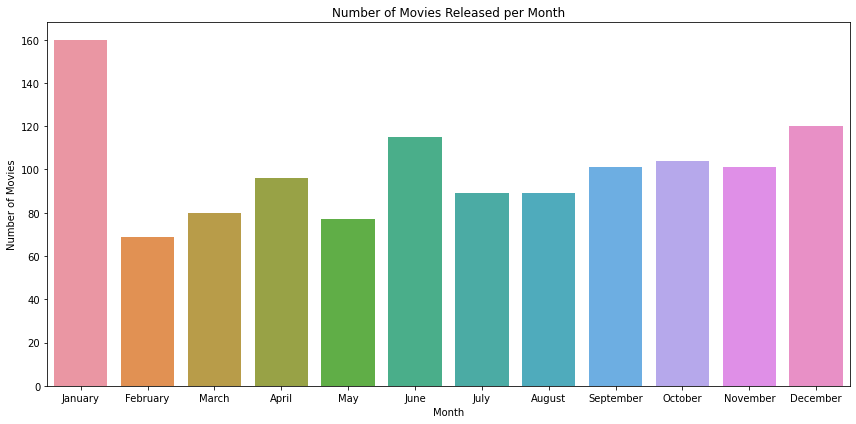

In [6]:
#Counting the number of movies released each month
month_counts = merged_df1['theater_month'].value_counts().sort_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

#Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, order=month_order)
plt.title('Number of Movies Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

**Observation**

The data reveals that January has the highest number of movie releases, followed by December and June. On the lower end, February has the fewest releases, followed by May. July and August show a similar level of distribution, with nearly equal numbers of movie releases.

**Key Insight**

Studios appear to time their movie releases around periods of increased audience availability and interest. The peak in January may be due to post-holiday audiences and early-year award contenders, while December benefits from holiday breaks and year-end momentum. The rise in June aligns with the beginning of the summer blockbuster season. Conversely, February and May likely represent slower periods in the moviegoing calendar, possibly avoided to reduce competition or due to historically lower attendance. The similar release levels in July and August suggest these months are also part of the summer release window but may be slightly less favored than June. Overall, the pattern underscores the strategic importance of seasonal timing in film release planning.

### Bivariate Analysis

Bivariate analysis looks at the relationship between two variables, and this will help us to understand how one variable may change based on another; it shows whether a variable is dependent or affected by another variable.

#### Bivariate Analysis on Top 10 Genres by Average Rating by Genre

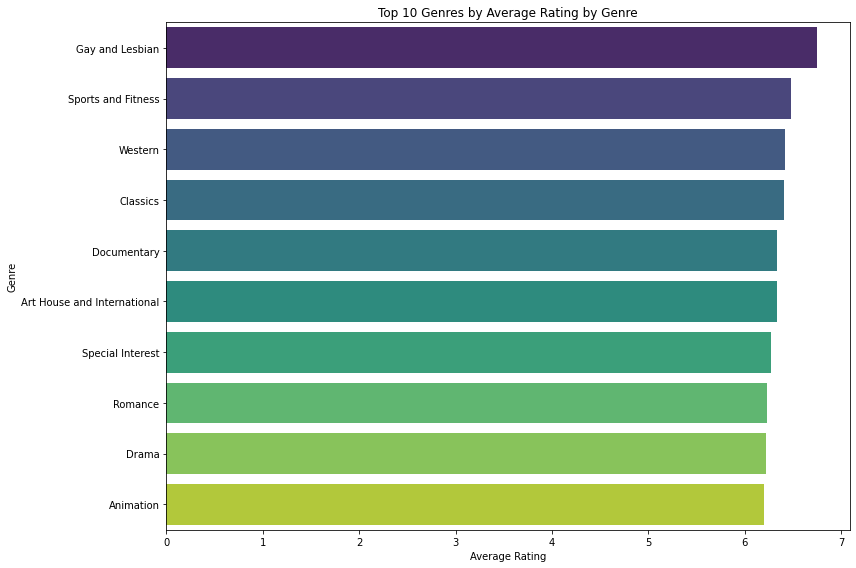

In [7]:
#Grouping by genre and acquiring the top 10 genre by average rating
genre_rating = merged_df1_exploded.groupby('genre')['rating_10_point'].mean().sort_values(ascending=False).head(10)

#Plotting the graph
plt.figure(figsize=(12,8))
sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='viridis')
plt.title('Top 10 Genres by Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**Observation**

Among the top 10 genres by average rating, Gay and Lesbian films had the highest average rating, followed by Sports and Fitness. Western and Classics genres also performed strongly, with nearly identical average ratings, indicating consistent viewer appreciation.

**Key Insight**

Less mainstream genres such as Gay and Lesbian, Sports and Fitness, Western, and Classics tend to receive higher average ratings, possibly because these films often cater to dedicated audiences who appreciate their specific themes. This could also reflect the higher quality or emotional impact often associated with films in these genres, as well as lower production volume leading to more curated content. While these genres may not dominate in quantity, they often deliver strong storytelling, cultural depth, or emotional resonance that resonates with audiences.Studios exploring new projects might consider investing in these high-performing genres to tap into loyal, engaged viewer bases.

#### Bivariate Analysis on Bottom 10 Genres by Average Rating

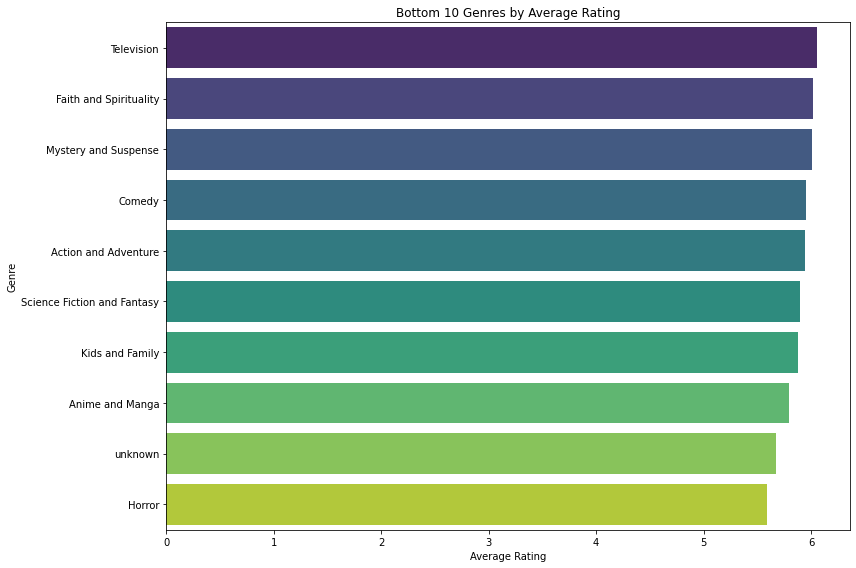

In [8]:
#Grouping and acquiring the bottom 10 genres by average rating
genre_rating = (merged_df1_exploded.groupby('genre')['rating_10_point'].mean().sort_values(ascending=False).tail(10))

#Plotting the graph
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='viridis')
plt.title('Bottom 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


**Observation**

The bottom genres by average rating reveal that Television has the lowest ratings overall, followed by Faith and Spirituality, then Mystery and Suspense, and Comedy. These genres appear to receive lower average ratings from audiences compared to others.

**Key Insight**

Genres like Television and Faith and Spirituality may suffer from inconsistent production quality or may cater to niche audiences, affecting their overall ratings. The lower performance of Mystery and Suspense and Comedy could suggest that audiences are more critical of these genres, perhaps due to high expectations for plot complexity or humor delivery. For a new movie studio, this insight implies the need for careful execution and originality when working in these genres to avoid being lost in a saturated and critically scrutinized space.

#### Bivariate Analysis on Runtime vs. Rating (10-Point Scale)

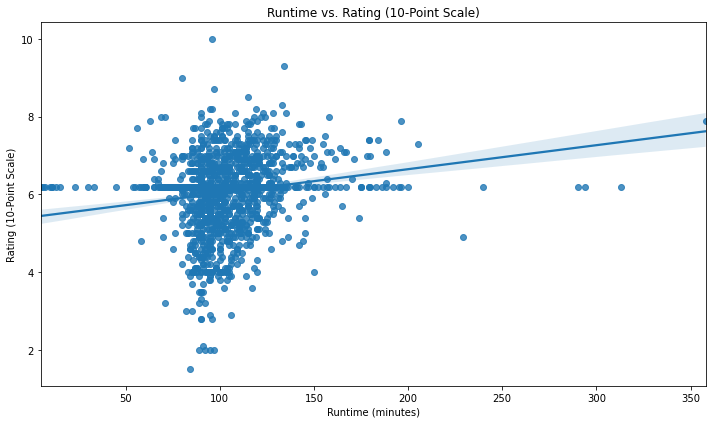

In [9]:
#Plotting a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df1, x='runtime', y='rating_10_point')
plt.title('Runtime vs. Rating (10-Point Scale)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating (10-Point Scale)')
plt.tight_layout()
plt.show()

**Observation**

The majority of movies with high ratings fall within a runtime of 70 to 140 minutes. Within this range, there is a noticeably dense cluster of films that received stronger audience or critic ratings on the 10-point scale. Outside this range, especially beyond 140 minutes or below 70 minutes, high-rated films exist but they are much fewer.

**Key Insight**

Most successful movies based on average ratings tend to have runtimes between 70 and 140 minutes. This indicates that audiences may prefer films that are concise yet long enough to develop a complete and engaging story. Extremely short or overly long films appear less likely to receive top ratings. For a new studio, aiming for this optimal runtime window could improve both viewer satisfaction and critical reception.

#### Bivariate Analysis on Top 10 Directors by Average Rating

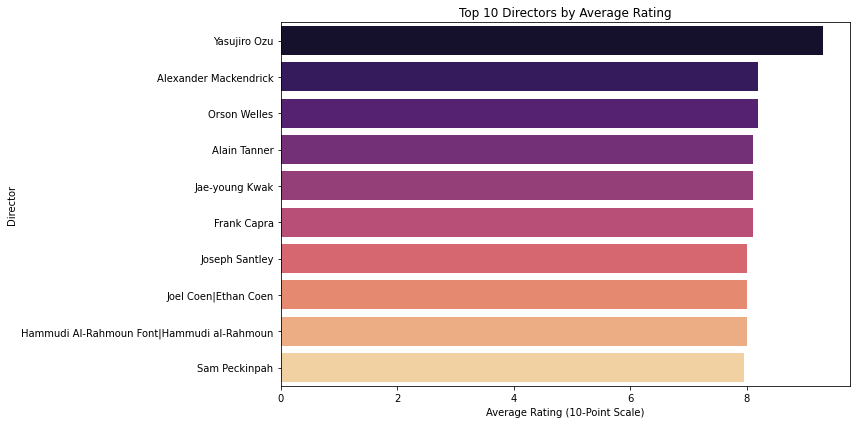

In [10]:
#Groupping by director and calculating the average rating
director_rating = merged_df1.groupby('director')['rating_10_point'].mean().sort_values(ascending=False).head(10)

#Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=director_rating.values, y=director_rating.index, palette='magma')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating (10-Point Scale)')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

**Observation**

The analysis of average movie ratings reveals that directors such as Yasujiro Ozu, Alexander Mackendrick, and Orson Welles top the list with the highest audience scores. These names, along with seven other highly rated directors, consistently produced films that resonated well with viewers, indicating a pattern of strong critical or public approval across their work.

**Key Insights**

The consistently high ratings achieved by these top directors indicate a strong audience appreciation for their work—likely due to their storytelling style, technical execution, or unique artistic vision. For a new movie studio aiming to break into the industry with strong audience reception, collaborating with any of these top-rated directors, or studying their successful approaches could be a strategic move. Leveraging the expertise or inspiration from such directors may help ensure high-quality productions and improve market credibility early on.

#### Bottom 10 Directors by Average Rating

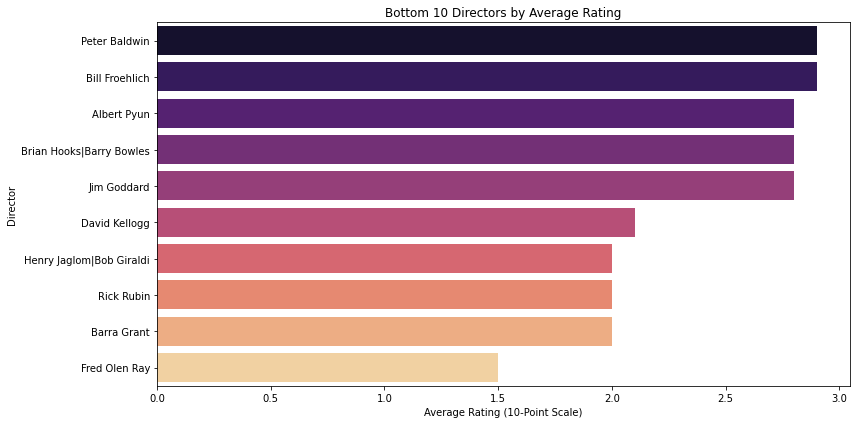

In [11]:
#Grouping by director and getting the average rating
director_rating = merged_df1.groupby('director')['rating_10_point'].mean().sort_values(ascending=False).tail(10)

#Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x=director_rating.values, y=director_rating.index, palette='magma')
plt.title('Bottom 10 Directors by Average Rating')
plt.xlabel('Average Rating (10-Point Scale)')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

**Observation**

The analysis of the bottom 10 directors by average audience rating reveals that Peter Baldwin, Bill Froehlich, and Albert Pyun are among those whose films received the lowest ratings in the dataset. These directors, along with others in the bottom group, consistently produced movies that were less well-received by audiences.

**Key Insights**

Directors in the lowest-rated group appear to have struggled with audience engagement or overall film quality. For a new movie studio aiming to build a strong reputation, it would be strategic to avoid adopting similar directorial styles or collaborating with filmmakers who have a track record of poor reception. Focusing on proven talent with higher average ratings could help the studio minimize risk and build credibility in a competitive industry.

#### Bivariate Analysis on Rating Distribution by Month of Release

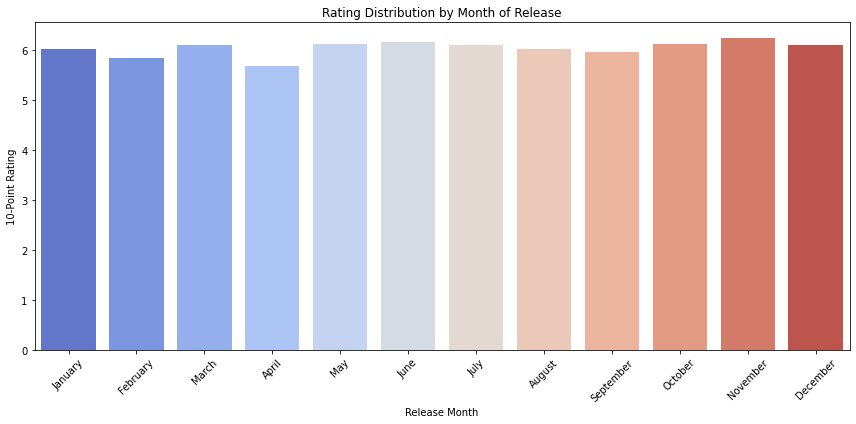

In [12]:
#Dropping rows where either month or rating is missing
plot_data = merged_df1.dropna(subset=['theater_month', 'rating_10_point'])

#Making an order in which the months will appear
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

#Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x='theater_month', y='rating_10_point', data=plot_data, order=month_order, palette='coolwarm', ci=None)
plt.title('Rating Distribution by Month of Release')
plt.xlabel('Release Month')
plt.ylabel('10-Point Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation**

The rating distribution across the months of release shows relatively minimal variation, indicating that audience ratings are fairly consistent regardless of release month. However, November stands out with the highest average ratings, followed closely by June. On the lower end, April has the least average rating, followed by February.

**Key Insight**

The consistent ratings across months suggest that audiences evaluate movies based on quality rather than timing alone. However, the slightly higher average ratings in November and June may indicate that studios tend to release their most polished or critically ambitious films during these periods, possibly aligning with award season buzz or summer blockbuster appeal. Conversely, the lower ratings in April and February might point to these months being used for less prominent releases. For a new movie studio, targeting strategic release windows like June and November could help position their films for stronger critical reception and visibility.

### Multivariate Analysis

Multivariate analysis looks at the relationship between three or more variables at the same time, and it is used to uncover more complex patterns and deeper insights.

#### Multivariate Analysis on Average Rating by Genre and Director

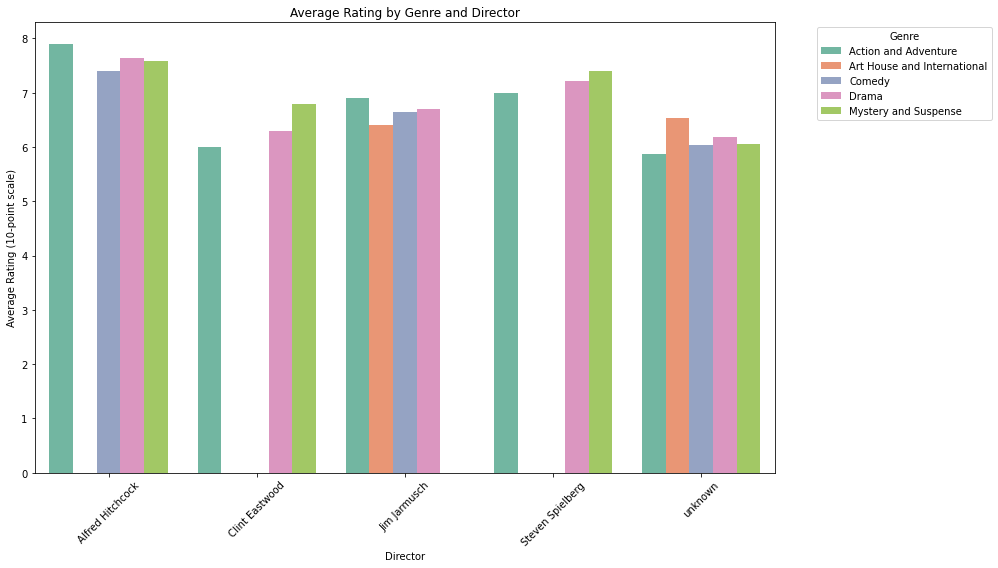

In [13]:
#Acquiring the average rating per genre and month
grouped = merged_df1_exploded.groupby(['genre', 'director'])['rating_10_point'].mean().reset_index()

#Filtering to the top 10 most common genres for readability
top_genres = merged_df1_exploded['genre'].value_counts().head(5).index
filtered = grouped[grouped['genre'].isin(top_genres)]

#Filtering to the top 5 most common writers
top_writers = merged_df1_exploded['director'].value_counts().head(5).index
filtered = filtered[filtered['director'].isin(top_writers)]

#Plotting the combined bar graph
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered, x='director', y='rating_10_point', hue='genre', palette='Set2')
plt.title('Average Rating by Genre and Director')
plt.xlabel('Director')
plt.ylabel('Average Rating (10-point scale)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation**

From the chart on Average Rating by Genre and Director, Alfred Hitchcock consistently holds the highest average rating across all represented genres, with his top-rated work appearing in Action & Adventure, followed closely by Drama. Steven Spielberg follows as the second-highest-rated director, especially in the Mystery & Suspense genre, and also performs strongly in Drama.

**Key Insight**

The consistently high average ratings associated with Alfred Hitchcock and Steven Spielberg across multiple genres suggest that director influence plays a significant role in a film's success. For a new studio, aligning with directors known for their genre mastery or adopting their storytelling techniques could be a strategic advantage in producing high-quality, audience-approved films. Hitchcock's success in Action & Adventure and Drama, and Spielberg's in Mystery & Suspense, indicate clear genre-director synergies worth modeling.

#### Multivariate Analysis of Average Rating by Genre and Rating

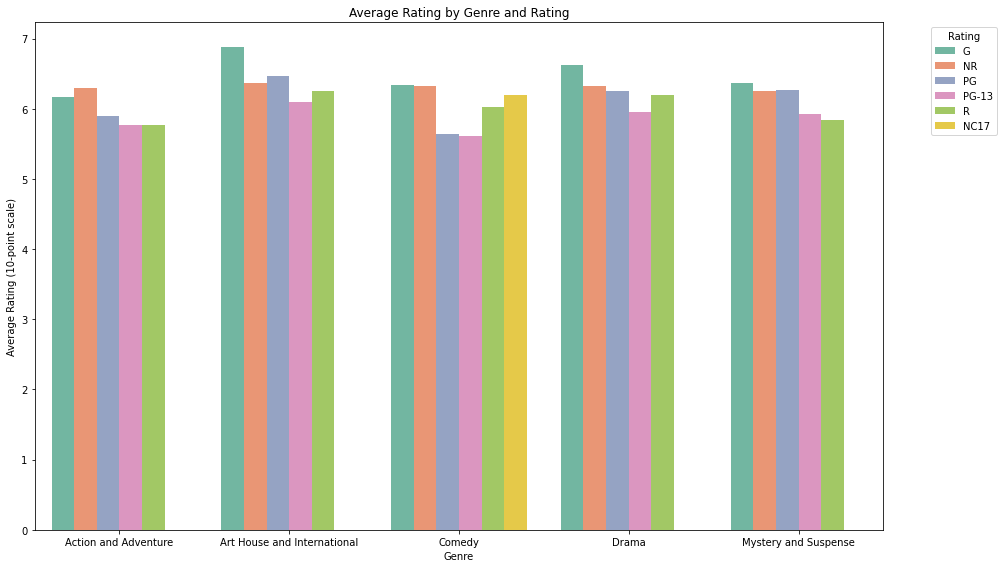

In [14]:
# Get average rating per genre and month
grouped = merged_df1_exploded.groupby(['genre', 'rating'])['rating_10_point'].mean().reset_index()

# Filter to top 10 most common genres for readability
top_genres = merged_df1_exploded['genre'].value_counts().head(5).index
filtered = grouped[grouped['genre'].isin(top_genres)]

#Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered, x='genre', y='rating_10_point', hue='rating', palette='Set2')
plt.title('Average Rating by Genre and Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating (10-point scale)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observation**

In the visual representation of Average Rating by Genre and Rating, the "G" (General Audience) rating consistently shows the highest average ratings across all represented genres. Notably, "G" rated films in the "Art House and International" genre rank the highest overall, followed by "G" rated films in Drama. On the lower end, "PG-13" and "PG" rated films in Comedy received the lowest average ratings. The "NC-17" rating appears only once, and exclusively in the Comedy genre.

**Key Insight**

This distribution highlights that audiences tend to favor content with broader accessibility and emotional depth, such as G-rated films in drama and artistic genres. Meanwhile, comedic films with moderate content restrictions (PG/PG-13) appear to struggle with audience reception, possibly due to mismatched tone or expectations. For a new movie studio, this suggests that developing high-quality G-rated films in niche or emotionally resonant genres could lead to stronger ratings, while greater care should be taken when producing comedy films with PG or PG-13 ratings, ensuring the humor aligns well with audience preferences. The "NC-17" rating appearing only once shows that it is extremely rare, especially in mainstream cinema, because it significantly limits a film's commercial potential.

### Recommendations:

From our analysis on the Rotten Tomatoes dataset, we can draw some conclusions that will help guide the new movie studio in making data-driven decisions on the types of films to produce, which genres and ratings to prioritize, the most favorable release months, and which directors or creative strategies to align with in order to maximize audience approval and box office success. The recommendations include:

1. Focus on Gay & Lesbian, Sports & Fitness, Classics, and Western because they receive strong audience approval, and for genres like Television, Faith & Spirituality, and Comedy proceed with caution or raise quality, because they have lower ratings.

2. Consider working with or emulating directors like Yasurijo Oju, Alexander Mackendrick, and Alfred Hitchcock, as their movies give the highest rating, and directors like Peter Baldwin and Bill Froehlich with consistent poor ratings should be avoided to maintain brand quality.

3. Aim for November and June releases when ratings and engagement are highest, and keep runtimes between 70–140 minutes because this range aligns best with higher audience ratings.

4. Blend strong genres together like Drama + Sports, as this can increase appeal and uniqueness, therefore attracting more audience. 

5. Explore underutilized release months such as February, May, July, and August because they have less competition therefore presenting opportunities to stand out.

## HYPOTHESIS TESTING

To support our business goal of advising a new movie studio on what types of films perform best at the box office, we are conducting a hypothesis test to determine whether the month in which a movie is released has a significant impact on its average audience rating. The business question guiding our analysis is: Does the month of release significantly affect a movie’s average rating? Understanding the effect of release timing on ratings is essential, as higher-rated films are more likely to attract favorable word-of-mouth, stronger critical acclaim, and ultimately better box office performance. By testing whether movies released in certain months consistently receive higher or lower ratings, we can provide the studio with evidence-based recommendations on optimal release periods. This insight will help the studio strategically plan their release schedule to align with periods that historically yield better audience reception, giving their films a stronger chance of success in a competitive market.

Since we are comparing more than two groups, which in this case is ratings from movies released in multiple different months, ANOVA is the most appropriate test, because it allows us to see if at least one month has a significantly different average rating compared to the others, without having to run multiple pairwise t-tests. If the ANOVA test shows a significant result, it suggests that release month does affect audience ratings, which can directly inform the studio's strategy for choosing optimal release times to maximize audience reception. 

Hypothesis Test: Does the month of release significantly affect a movie’s average rating?
This helps the studio decide which months to release their movies for better audience reception.

     Null Hypothesis: There is no significant difference in average movie ratings across different release months.
     Alternative Hypothesis: At least one month has a significantly different average rating compared to others.

In [15]:
from scipy import stats

#Make a copy of the clean dataset that we will use to carry the test
df = merged_df1.copy()

#Group ratings by month
groups = []
for month, group in df.groupby('theater_month'):
    if not group.empty:
        groups.append(group['rating_10_point'])
        
#Run ANOVA test
f_stat, p_val = stats.f_oneway(*groups)

#Print the result
print("F-statistic:", round(f_stat, 3))
print("P-value:", round(p_val, 5))

F-statistic: 2.392
P-value: 0.00621


After running the ANOVA test to determine whether the month of release has a significant impact on a movie’s average rating, we obtained a p-value of 0.00621.

This p-value is less than the commonly used significance level of 0.05, which means that the results are statistically significant. In simpler terms, there's strong evidence to reject the null hypothesis which stated that there is no difference in average movie ratings across different months.

**Interpretation:**

This result suggests that the month in which a movie is released does have a significant effect on how it is rated. Therefore, timing a movie’s release could influence how well it is received by audiences.

**Business Insight**

This finding is useful for the new movie studio as it indicates that choosing the right release month can be part of a successful strategy to boost movie ratings, and possibly box office performance.